# Дашборды
   Дашборд А: https://public.tableau.com/app/profile/german1314/viz/final_project_16652585334210/DashboardA?publish=yes
   
   Дашборд B :https://public.tableau.com/app/profile/german1314/viz/final_project_16652585334210/DashboardB?publish=yes

# Презенатация
https://1drv.ms/p/s!Av1D_sdJ6zeIhivQDZe9JkGrGqQ4?e=cycze6

<a id="0"></a> <br>
 # Формирование модели монетизации 
  
   ## Задача:
           Сформировать модель монетизации игрового приложения и выбрать оптимальное время для запуска рекламы. Провести         
           исследовательский анализ данных, проверить гипотезы и расчитать основные бизнес метрики приложения.
  ### **Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.


  ## Оглавление:
   
1. [Изучение общей информации](#1)     
1. [Предобработка данных](#2) 
    1. Работа с пропусками
    1. Изменение типов данных
    1. Посик дубликатов
1. [Исследовательский анализ данных(EDA)](#3) 
    1. Анализ пользователей:
       1. Построим диаграмму кол-ва построенных обьектов
       1. Построим диаграмму кол-во событий по дням
       1. Построим диаграмму кол-во построенных зданий по дням c разбивкой по постройкам
      
    1. Анализ рекламных активностей:
       1. Построим диаграмму кол-ва источников, с которого пришёл пользователь, установивший приложение.
       1. Построим диаграмму костов по источникам
       1. Построим диаграмму костов по дням
    1. Анализ влияний событий на совершение целевого события:
       1. Построим график завимости между количеством зданий и завершением уровня
       1. Посторим график зависимости между количеством дней в игре и завершением уровня
       1. Построем график зависимости между источника, с которого пришли пользователи и завершением уровня
1. [Проверка гипотез](#4)   
    1. Гипотеза различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, 
       и пользователями, которые заканчивают уровень победой над другим игроком
    1. Среднее кол-во построенных зданий для пользователей, завершивших уровень через проект и убийством врага различаются.
1. [Анализ бизнес показателей](#5) 
    1. Анализ затрат на привлечения клиентов (CAC)
    1. Анализ дохода с рекламы (LTV)
1. [Общий вывод](#6)   
     1. Главные факты, интересные моменты и выводы о проекте    
    

# 1. Изучение общей информации  <a id=1></a> 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# изучим данные
try:
    cost = pd.read_csv('/datasets/ad_costs.csv')
    actions = pd.read_csv('/datasets/game_actions.csv')
    source = pd.read_csv('/datasets/user_source.csv')
except:
    print('Что то пошло не так.')

In [3]:
# настроим принудительное отображение
pd.set_option('display.max_columns', None)
#Установим ширину ячеек
pd.set_option("max_colwidth", 999)

import warnings
warnings.simplefilter('ignore')

In [4]:
cost.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [5]:
actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [6]:
source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


# Предобработка данных <a id=2></a> 

In [7]:
#Посмотрим общую информацию об основном датасете
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [8]:
# скорректируем столбец даты
actions['event_datetime'] = pd.to_datetime(actions['event_datetime'])
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [9]:
actions[actions['event'] =='project']

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [10]:
actions.duplicated().sum()

1

In [11]:
# уберем дубликат в данных
actions = actions.drop_duplicates().reset_index(drop= True)

In [12]:
actions.duplicated().sum()

0

В целом данные по основному датасету чистые. Заменили тип данных в дате события и удалили дубликат. Пропуски в выборе типа здания вполне понятны, ведь если пользователь совершает событие не связанное с постройкой здания(например завершение проекта), то в строке будет пропуск. Тоже самое в типе реализованного проекта, если пользователь не завершает проект.


In [13]:
# заменим числовой формат на дни
actions['event_datetime'] = actions['event_datetime'].dt.date

In [14]:
# посмотрим на данные о костах
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [15]:
# скорректируем столбец даты
cost['day'] = pd.to_datetime(cost['day'])
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [16]:
cost.duplicated().sum()

0

Тут все в порядке. Только заменили тип данных в дате

In [17]:
# посмотрим на данные о костах
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [18]:
source.duplicated().sum()

0

Тут все ОК.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⛅️ Действительно, все ок)
</div>




# EDA <a id=3></a> 

## Анализ пользователей

In [19]:
# узнаем кол-во уникальных пользователей
print(len(actions['user_id'].unique()))

13576


In [20]:
# узнаем сколько пользователей прошли первый уровень
actions[actions['event']=='finished_stage_1'].count()[0]

5817

In [21]:
# узначем процент пользователей, которые прошли первый уровень
percentage = (actions[actions['event']=='finished_stage_1'].count()[0]/len(actions['user_id'].unique())) * 100
percentage

42.847672362993514

Всего у нас 13576 уникальных пользователей за этот период. Из них 5817 уже прошли первый уровень. Получается, что около 42% пользователей прошли первый уровень.

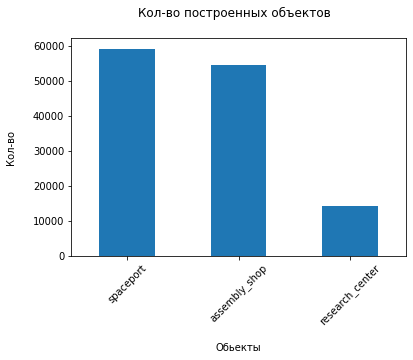

In [22]:
# построим диаграмму кол-ва построенных обьектов
count_obj = actions.groupby('building_type')['building_type'].count().sort_values(ascending=False)

count_obj.plot(kind='bar')
plt.title('Кол-во построенных объектов  \n ')
plt.ylabel("Кол-во \n")
plt.xlabel(" \nОбьекты")
plt.xticks(rotation=45)
plt.show()

Исследовательский центр строится гораждо реже чем космопорт и сборочный цех. Скорее всего на него нужно потратить больше ресурсов.

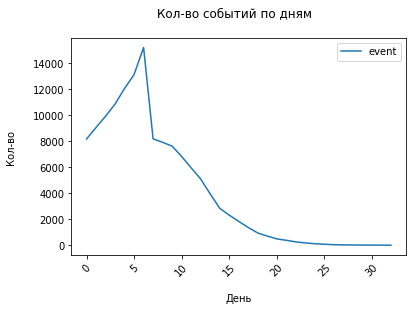

In [23]:
# построим диаграмму кол-во событий по дням
day_events = actions.groupby('event_datetime')['event'].count().to_frame().reset_index()

day_events.plot()
plt.title('Кол-во событий по дням  \n ')
plt.ylabel("Кол-во \n")
plt.xlabel(" \nДень")
plt.xticks(rotation=45)
plt.show()

За первые 5 дней пользователи активно строили здания. Затем, скорее всего, постройки требуют больше ресурсов и так быстро их уже не построишь.

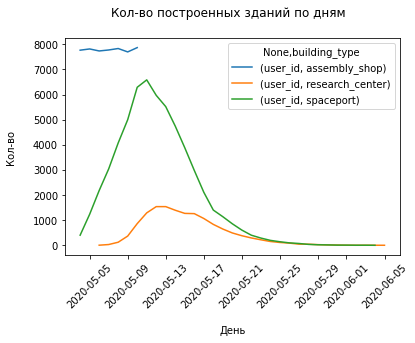

In [24]:
# посмтроим диаграмму кол-во построенных зданий по дням c разбивкой по постройкам
p = actions[['event_datetime', 'building_type', 'user_id']].pivot_table(
    index='event_datetime', columns='building_type', aggfunc='count').plot()

plt.title('Кол-во построенных зданий по дням  \n ')
plt.ylabel("Кол-во \n")
plt.xlabel(" \nДень")
plt.xticks(rotation=45)
plt.show()

За первые 7 дней игроки очень активно строили сборочные цехи, затем в дело всупили космопорты и исследовательские центры. Странно, что все пользователи через неделю перестали строить сборочные цехи

In [25]:
# посмотрим сколько польвателей прошли уровень через убийство врага, а сколько через завершение проекта
finished_level = actions[actions['event']!='building']

In [26]:
# через проект
finished_level[finished_level['event']=='project'].count()[0]

1866

In [27]:
len(finished_level['user_id'].unique())

5817

1866 игроков завершили уровень завершением проекта и 3951 победой над врагом. Видимо 2 вариант проще. Возможно, пользователь случайно встречается с другим игроком и вынужден будет биться. Или строить проект просто более нудное и затратное по времени дело.

## Анализ рекламных активностей

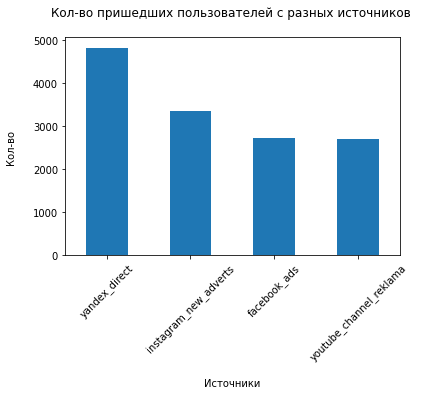

In [28]:
# построим график кол-ва пришедших пользователей с источников
s = source.groupby('source')['user_id'].count().sort_values(ascending=False)
s.plot(kind='bar')
plt.title('Кол-во пришедших пользователей с разных источников \n ')
plt.ylabel("Кол-во \n")
plt.xlabel(" \nИсточники")
plt.xticks(rotation=45)
plt.show()

Больше всего пользователей приходит с Яндекс директа.

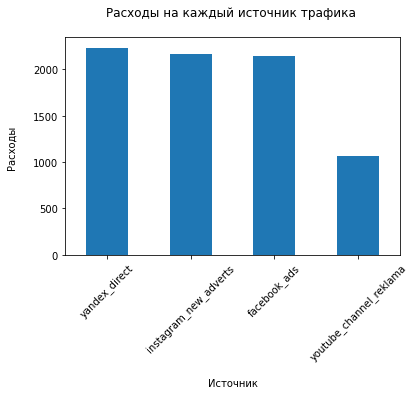

In [29]:
# Постотрим на расходы на каждый источник трафика
cbs = cost.groupby('source')['cost'].sum().sort_values(ascending=False)
cbs.plot(kind='bar')
plt.title('Расходы на каждый источник трафика \n ')
plt.ylabel("Расходы \n")
plt.xlabel(" \nИсточник")
plt.xticks(rotation=45)
plt.show()


In [30]:
s = s.to_frame().reset_index()
cbs = cbs.to_frame().reset_index()

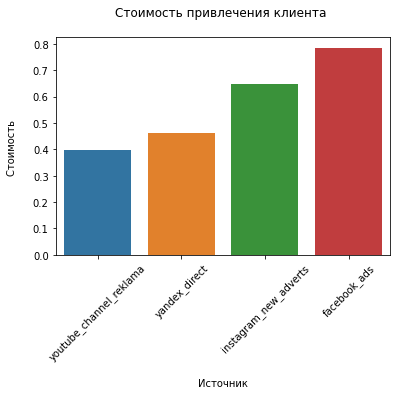

In [31]:
# найдем расход на нового клиента для каждого источника

cpu = s.merge(cbs, on='source')
cpu['cost_per_user'] = cpu['cost']/cpu['user_id']
cpu = cpu.sort_values(by='cost_per_user')

sns.barplot(x='source', y='cost_per_user', data=cpu)
plt.title('Стоимость привлечения клиента \n ')
plt.ylabel("Стоимость \n")
plt.xlabel(" \nИсточник")
plt.xticks(rotation=45)
plt.show(
)


Несмотря на то, что с Youtube к нам пришло меньше всего клиентов, из-за дешевой рекламы это самая низкая стоимость нового пользователя. Получается, что один показ рекламы(с которого мы получаем 0,07$) полностью окупает приход нового пользователя.(кроме Facebook)

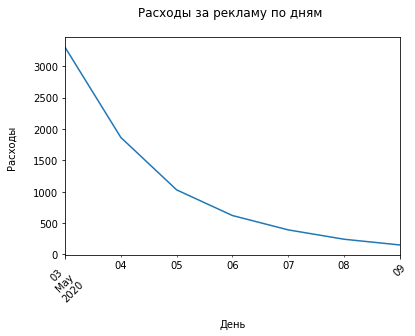

In [32]:
cpd = cost.groupby('day')['cost'].sum()
cpd.plot()
plt.title('Расходы за рекламу по дням \n ')
plt.ylabel("Расходы \n")
plt.xlabel(" \nДень")
plt.xticks(rotation=45)
plt.show()

Стоимость кликов монотонно убывает. Получается, что с каждым днем все меньше пользователей кликали на показ рекламы, если цена за клик не менялась.

## Анализ влияния событий на совершение целевого события

In [33]:
# разобьем столбец 'event' на отедльные столбцы
def process_column(s):
    splits = s.split(' ')
    d = {}
    for key, *rest in [splits[i:i + 3] for i in range(0, len(splits), 3)]:
        d.setdefault(key, []).append(' '.join(rest))

    d2 = {}
    for key, values in d.items():
        if len(values) > 1:
            for i, value in enumerate(values):
                d2[f'{key}{i + 1}'] = value
        else:
            d2[key] = values[0]
    return pd.Series(d2)


actions = pd.merge(actions, actions.event.apply(process_column), left_index=True, right_index=True)

In [34]:
actions

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,,NaN,NaN
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,,NaN,NaN
...,...,...,...,...,...,...,...,...
135634,2020-06-05,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,,NaN,NaN
135635,2020-06-05,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,NaN,,NaN
135636,2020-06-05,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,,NaN,NaN
135637,2020-06-05,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,NaN,,NaN


In [35]:
# построим график завимости между количеством зданий и завершением уровня
build_fin = actions.groupby('user_id')[['building_type', 'finished_stage_1']].count().reset_index()
build_fin

,user_id,building_type,finished_stage_1
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,1
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,0
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,1
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,0


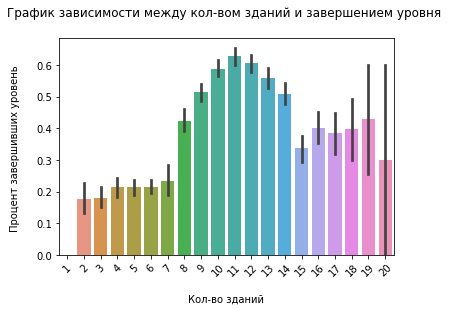

In [36]:
sns.barplot(x='building_type', y='finished_stage_1', data=build_fin)
plt.title('График зависимости между кол-вом зданий и завершением уровня \n ')
plt.ylabel("Процент завершивших уровень \n")
plt.xlabel(" \nКол-во зданий")
plt.xticks(rotation=45)
plt.show()

Как мы видим, крайне мало людей завершило уровень с маленький количеством построек(до 7). Дальше процентное соотношение стремительно растет, а затем опять падает. Много людей иметь больше 15 зданий и при этом не заканчивают уровень. Возможно они не нажимают на кнопку завершения уровня или строят много зданий с небольшой стоимостью.

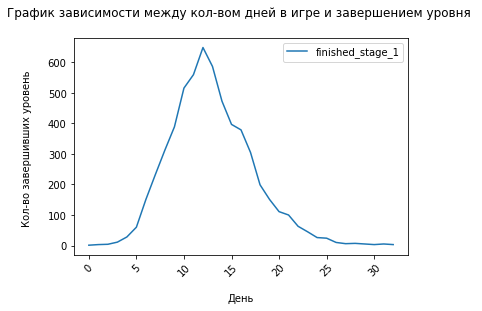

In [37]:
# посторим график зависимости между количеством дней в игре и завершением уровня

day_fin = actions.groupby('event_datetime')[ 'finished_stage_1'].count().reset_index()

day_fin.plot()
plt.title('График зависимости между кол-вом дней в игре и завершением уровня \n ')
plt.ylabel("Кол-во завершивших уровень \n")
plt.xlabel(" \nДень")
plt.xticks(rotation=45)
plt.show()

Сначало кол-во завершивших уровень стремительно растет до определенного момента, а потом резко падает. Большинство пользователей за 13 дней либо уже заканчивает уровень либо перестает играть и отваливается.

In [38]:
# построем график зависимости между источника, с которого пришли пользователи и завершением уровня
actions = actions.merge(source, on='user_id')

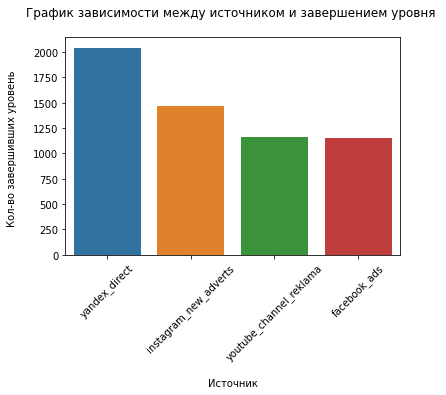

In [39]:
l = (actions.groupby('source')['finished_stage_1'].count().to_frame()
                                             .reset_index().sort_values(by='finished_stage_1',ascending=False))
sns.barplot(x='source',y='finished_stage_1',data=l)
plt.title('График зависимости между источником и завершением уровня \n ')
plt.ylabel("Кол-во завершивших уровень \n")
plt.xlabel(" \nИсточник")
plt.xticks(rotation=45)
plt.show()

Пользователи, которые пришли с Яндекс Директа больше чаще заканчивают уровень, чем пользователи, которые пришли с Facebook. Возмонжо с Яндекс Директа идет более мололежное сообщество чем с Facebook. 

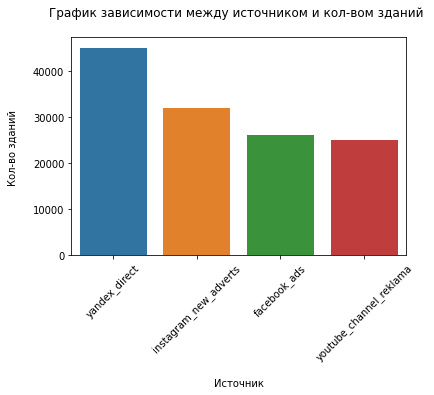

In [40]:
d = (actions.groupby('source')['building_type'].count().to_frame()
                                 .reset_index().sort_values(by='building_type',ascending=False))

sns.barplot(x='source',y='building_type',data=d)
plt.title('График зависимости между источником и кол-вом зданий \n ')
plt.ylabel("Кол-во зданий \n")
plt.xlabel(" \nИсточник")
plt.xticks(rotation=45)
plt.show()

Пользователи Яндекс директа чаще заканчивают уровень, тем самым строят больше зданий. Это стоит учитывать, ведь при каждой постройке здания пользотвалеь смотрит рекламу.

In [41]:
# найдем среднее кол-во построенных зданий для пользователей, завершивших уровень через проект и убийством врага
p = actions[actions['event'] == 'project']
pr = actions['user_id'].isin(p['user_id'])
projects = actions[pr]
projects

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source
7,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,facebook_ads
8,2020-05-06,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,facebook_ads
9,2020-05-07,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,facebook_ads
10,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,facebook_ads
11,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,facebook_ads
...,...,...,...,...,...,...,...,...,...
135583,2020-05-28,building,spaceport,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,yandex_direct
135584,2020-05-28,building,research_center,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,yandex_direct
135585,2020-05-30,building,research_center,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,yandex_direct
135586,2020-06-01,project,NaN,637a8d39-3872-4549-80cc-bebee6c88056,satellite_orbital_assembly,NaN,NaN,,yandex_direct


In [42]:
print('Среднее кол-во зданий пользователей через проект:', projects['building_type'].count()/len(projects['user_id'].unique()))

Среднее кол-во зданий пользователей через проект: 12.64790996784566


In [43]:
enemy = ~actions['user_id'].isin(p['user_id'])
enemy = actions[enemy]
enemy = enemy[enemy['event']=='finished_stage_1']
enemy = actions['user_id'].isin(enemy['user_id'])
enemy = actions[enemy]
enemy

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source
20,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN,instagram_new_adverts
21,2020-05-07,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN,instagram_new_adverts
22,2020-05-07,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN,instagram_new_adverts
23,2020-05-07,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN,instagram_new_adverts
24,2020-05-08,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN,instagram_new_adverts
...,...,...,...,...,...,...,...,...,...
135616,2020-05-17,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,youtube_channel_reklama
135617,2020-05-23,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,youtube_channel_reklama
135618,2020-05-26,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,youtube_channel_reklama
135619,2020-05-30,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,youtube_channel_reklama


In [44]:
print('Среднее кол-во зданий пользователей через убийство врага:', enemy['building_type'].count()/len(enemy['user_id'].unique()))

Среднее кол-во зданий пользователей через убийство врага: 9.411541381928625


Пользователи, которые заканчивают проект через завершение проекта в среднем строят больше зданий, чем через убийством врарга. Нужно будет потвердить гипотезу статистичеки, но если она потвердится, то скорее всего показывать рекламу на выборе типа объекта для постройки не самая лучшая идея, так как в завимости от стратегии пользователя мы зарабатывает разное кол-во денег. Плюс большинство пользователей проходит уровень именно через убийство врага.

# Проверим гипотезы <a id=4></a> 
       
        H0: среднее время прохождение уровня через проект = среднее время прохождение уровня через убийство врага 
        H1: среднее время прохождение уровня через проект != среднее время прохождение уровня через убийство врага 

In [45]:
# найдем для каждого условия выполнения уровня первое и последнее событие для каждого пользователя
mean_time_projects = projects.groupby('user_id')['event_datetime'].agg(['first','last']).reset_index()
mean_time_projects

,user_id,first,last
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20
...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16


In [46]:
mean_time_projects['diffr'] = mean_time_projects['last'] - mean_time_projects['first']
mean_time_projects

,user_id,first,last,diffr
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16,12 days
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24,16 days
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27,20 days
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18,14 days
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20,15 days
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23,19 days
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13,8 days
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18,14 days
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16,11 days


In [47]:
mean_time_projects['diffr'].mean()

Timedelta('13 days 09:31:03.665594855')

In [48]:
mean_time_enemy = enemy.groupby('user_id')['event_datetime'].agg(['first','last']).reset_index()
mean_time_enemy['diffr'] = mean_time_enemy['last'] - mean_time_enemy['first']
mean_time_enemy['diffr'].mean()

Timedelta('11 days 01:24:11.480637813')

In [49]:
# переведем тип данных даты в формат дней, так как тест не примет формат timedelta
mean_time_projects['total_days_td'] = mean_time_projects['diffr'] / pd.to_timedelta(1, unit='D')
mean_time_enemy['total_days_td'] = mean_time_enemy['diffr'] / pd.to_timedelta(1, unit='D')

In [50]:
mean_time_projects

,user_id,first,last,diffr,total_days_td
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16,12 days,12.0
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24,16 days,16.0
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27,20 days,20.0
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18,14 days,14.0
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20,15 days,15.0
...,...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23,19 days,19.0
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13,8 days,8.0
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18,14 days,14.0
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16,11 days,11.0




        H0: среднее время прохождение уровня через проект = среднее время прохождение уровня через убийство врага 
        H1: среднее время прохождение уровня через проект != среднее время прохождение уровня через убийство врага 

In [51]:
# протестируем нашу гипотезу
from scipy import stats as st
project_hyp = mean_time_projects['total_days_td']
enemy_hyp = mean_time_enemy['total_days_td']

print('cреднее время прохождения уровня через проект: ',pd.Series(project_hyp).mean())
print('cреднее время прохождения уровня через убийство врага: ',pd.Series(enemy_hyp ).mean())

alpha = 0.05 # возьме критический уровень статистической значимости 5%

results = st.ttest_ind(
    project_hyp, 
     enemy_hyp)
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Разница Статистически Значима!")
else:
    print("РАЗЛИЧИЙ между временем прохождения Нету!")

cреднее время прохождения уровня через проект:  13.396570203644158
cреднее время прохождения уровня через убийство врага:  11.0584662110858
p-значение: 4.363370007994992e-96
Разница Статистически Значима!


Учитывая очень низкое p-value, мы с уверенностью можем сказать, что разницу между временим прохождения уровня в зависимости от выбора стратегии статистически значима.

## Гипотеза 2
    H0: Среднее кол-во построенных зданий для пользователей через проект = Среднее кол-во построенных зданий для пользователей через  убийство врага
    H1: Среднее кол-во построенных зданий для пользователей через проект != Среднее кол-во построенных зданий для пользователей через убийство врага

In [52]:
mean_build_projects = projects.groupby('user_id')['building_type'].count().reset_index()
mean_build_projects

,user_id,building_type
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,11
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,11
3,00de2809-403e-4476-a2f7-ca1b11700190,13
4,00e83261-5fd4-4939-9616-802b5a0202c6,13
...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,18
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,11
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,13
1864,ff841992-d93b-462e-bc6e-18c24a514f36,20


In [53]:
mean_build_enemy = enemy.groupby('user_id')['building_type'].count().reset_index()
mean_build_enemy

,user_id,building_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,8
2,004074f8-251a-4776-922c-8348dca1a2f6,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,3
...,...,...
3946,ffc6f4fa-3476-47af-85cb-e2ee0551110a,13
3947,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,7
3948,ffe810f4-1a1f-464b-924d-6f120b0cb8df,16
3949,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9


    H0: Среднее кол-во построенных зданий для пользователей через проект = Среднее кол-во построенных зданий для пользователей через  убийство врага
    H1: Среднее кол-во построенных зданий для пользователей через проект != Среднее кол-во построенных зданий для пользователей через убийство врага

In [54]:
project_hyp_2 = mean_build_projects['building_type']
enemy_hyp_2 = mean_build_enemy['building_type']

print('Среднее кол-во построенных зданий для пользователей через проект: ',pd.Series(project_hyp_2).mean())
print('Среднее кол-во построенных зданий для пользователей через  убийство врага: ',pd.Series(enemy_hyp_2).mean())

alpha = 0.05 # возьме критический уровень статистической значимости 5%

results = st.ttest_ind(project_hyp_2, enemy_hyp_2)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Разница Статистически Значима!")
else:
    print("РАЗЛИЧИЙ между временем прохождения Нету!")

Среднее кол-во построенных зданий для пользователей через проект:  12.64790996784566
Среднее кол-во построенных зданий для пользователей через  убийство врага:  9.411541381928625
p-значение: 0.0
Разница Статистически Значима!


Гипотеза потвердилась. Действительно, в зависимости от выбора стратегии пользователя игрок в среднем строит разное кол-во зданий. Получается, что показывать рекламу на моменте выбора постройки не очень хорошая идея.

    1.Можно показывать рекламу во время паузы. 
    2.Также можно показывать рекламу в виде баннеров -  прямоугольных объявлений, которые показываются в пустом пространстве в верхней или нижней части экрана. Их показываются прямо во время игры, но не мешают играть. 
    3.Еще можно подумать об обьявлениях с вознаграждениями - это объявления, с которыми пользователь взаимодействует, чтобы получить какие-либо бонусы в приложении, которые иначе доступны только за деньги. Объявления с вознаграждением могут быть в формате видео или интерактивной игры.

# Анализ бизнес показателей <a id=6></a> 

## Анализ затрат на привлечения клиентов (CAC)

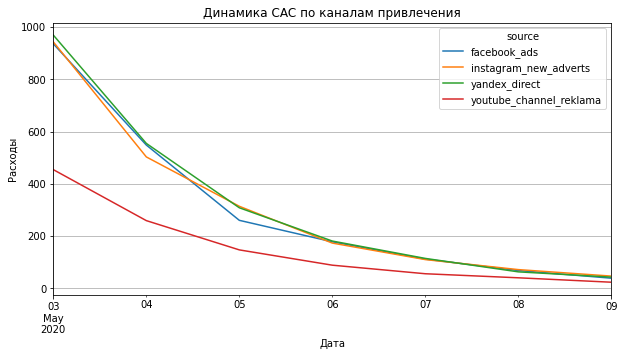

In [55]:
cost.pivot_table(
    index='day', columns='source', values='cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата')
plt.title('Динамика CAC по каналам привлечения')
plt.show()

По всем каналам расходы с каждым днем падали. Так как косты - это цена за клик, то это означает, что с каждым днем на рекламу кликало все меньше пользователей, если цена за клик не менялась.

In [56]:
buildings = actions.query('event !="finished_stage_1" and event !="project"')
buildings.head()

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama


In [57]:
finish = actions.query('event !="building"')
finish.head()

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source
17,2020-05-13,project,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,satellite_orbital_assembly,NaN,NaN,,facebook_ads
19,2020-05-15,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,NaN,,NaN,facebook_ads
32,2020-05-16,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,NaN,,NaN,instagram_new_adverts
49,2020-05-11,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,NaN,,NaN,yandex_direct
73,2020-05-16,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,NaN,,NaN,facebook_ads


In [58]:
buildings['revenue'] = 0.07

In [59]:
buildings

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source,revenue
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
...,...,...,...,...,...,...,...,...,...,...
135634,2020-05-13,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,,NaN,NaN,facebook_ads,0.07
135635,2020-05-18,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,,NaN,NaN,facebook_ads,0.07
135636,2020-05-10,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,,NaN,NaN,youtube_channel_reklama,0.07
135637,2020-05-13,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,,NaN,NaN,youtube_channel_reklama,0.07


In [60]:
rev = pd.concat([buildings, finish])
rev

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,source,revenue
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,youtube_channel_reklama,0.07
...,...,...,...,...,...,...,...,...,...,...
135534,2020-05-27,finished_stage_1,NaN,825e727b-7847-4c5f-a26c-3ee0f18d8177,NaN,NaN,,NaN,youtube_channel_reklama,NaN
135586,2020-06-01,project,NaN,637a8d39-3872-4549-80cc-bebee6c88056,satellite_orbital_assembly,NaN,NaN,,yandex_direct,NaN
135587,2020-06-02,finished_stage_1,NaN,637a8d39-3872-4549-80cc-bebee6c88056,NaN,NaN,,NaN,yandex_direct,NaN
135609,2020-05-26,finished_stage_1,NaN,0d37a895-ee0f-4e36-aadb-880cef670f0b,NaN,NaN,,NaN,yandex_direct,NaN


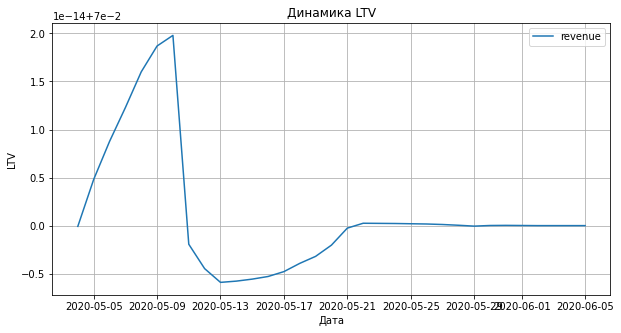

In [61]:
rev.pivot_table(
    index='event_datetime', values='revenue', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('LTV')
plt.xlabel('Дата')
plt.title('Динамика LTV')
plt.show()

За первые 4 дня есть очень польшой скачок, а затем резкий спад. Как я уже препологал, пользователи могут со временем строить меньше зданий из-за разных причин. Это не хорошо, когда LTV настолько нестабильный. Это еще раз говорит нам о том, что показ рекламы на выборе типа постройки не лучшая идея.

# Доработка

In [62]:
rev['event_datetime'] = pd.to_datetime(rev['event_datetime'])

In [63]:
first_day = rev.query('event_datetime == "2020-05-04"')
first_day_users = first_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
first_day_users = first_day_users.query('building_type!=0')
print('Среднее кол-во построенных зданий за 1 день:', first_day_users['building_type'].mean())

Среднее кол-во построенных зданий за 1 день: 1.39419795221843


In [64]:
second_day = rev.query('event_datetime == "2020-05-05"')
second_day_users = second_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
second_day_users = second_day_users.query('building_type!=0')
print('Среднее кол-во построенных зданий за 2 день:', second_day_users['building_type'].mean())

Среднее кол-во построенных зданий за 2 день: 1.4185864284594891


In [65]:
third_day = rev.query('event_datetime == "2020-05-06"')
third_day_users = third_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
third_day_users = third_day_users.query('building_type!=0')
print('Среднее кол-во построенных зданий за 3 день:', third_day_users['building_type'].mean())

Среднее кол-во построенных зданий за 3 день: 1.4476871443163577


# Вывод


Исходя из проведенного исследования можно представить такие утверждения:
        
      1. Большинство пользователей проходит игру за 11-13 дней.
      2. За первые 5 дней игры пользователи в среднем строят больше зданий.
      3. Больше всего пользователей пришло с рекламы Яндекс Директа.
      4. Была потверждена гипотеза о различии время прохождения уровня в зависимости от выбора стратегии игрока.
      5. Была потверждена гипотеза о разнице кол-ва построенных зданий в зависимости от выбора стратегии игрока.
      6. График динамики расходов по каналам привлечения монотонно убывает.
      7. LTV получился нестабильный.

Из-чего можно сделать вывод, что  медлить с запуском рекламы нельзя, ведь тогда мы потеряем большое кол-во выручки. Пользователи в среднем строят 1-2 здания в день и проходят уровень за 11-13 дней. Поэтому я рекомендовал бы интегрировать рекламу после 3 постройки пользователя. То-есть в среднем реклама будет начинаться ему показываться на следующий день. Тем самым, мы дадим пользователю привыкнуть к интерфейсу игры и не потеряем большую часть выручки.

Также допом можно вставить рекламу ввида обьявлений с вознаграждениями. Это видеореклама, за просмотр которой пользователь получает награду: оснащение для героев, игровые бонусы или жизни, подсказки, виртуальную валюту и другие. Люди будут получать бонусы за просмотр рекламы, а в играх это очень важно. Мотивация просмотреть рекламу до конца в разы возрастает.